# Data Handling and CSV Creating

In [1]:
import glob
import re
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pywt import wavedec
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import scipy.integrate as integrate
from statsmodels.tsa.ar_model import AutoReg
from pylab import figure,clf,plot,xlabel,ylabel,title,grid,axes,show
from scipy.signal import find_peaks
import scipy.signal
import pickle

In [2]:
# Dataset Classes:
# ________________

# Yukari-->Up
# Asagi-->Down
# Sag-->Right 
# Sol-->Left
# Kirp-->Blink 
# Center ????
# what h and v reprenets ??? 


In [3]:
class_names = {
    0: 'Up',
    1: 'Down',
    2: 'Right',
    3: 'Left',
    4: 'Blink'
}

In [4]:
names= np.arange(0,503)

In [5]:
df = pd.read_csv('Data Handling Concat.csv', names=names)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
0,123,122,127,130,123,123,127,128,125,125,...,143,139,143,141,139,138,142,136,137,1
1,120,132,120,127,126,125,120,125,122,118,...,143,140,139,144,142,139,139,143,134,1
2,136,130,141,136,137,135,144,133,143,144,...,143,141,148,148,144,149,147,150,150,1
3,148,150,139,144,144,144,139,148,142,146,...,135,128,131,132,132,131,133,135,136,1
4,118,112,121,120,116,115,119,116,118,115,...,143,138,135,144,133,133,137,140,95,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 503 entries, 0 to 502
dtypes: int64(503)
memory usage: 393.1 KB


In [8]:
def prepare(x,y_test):
    x=np.array(x)
    for i in x:
        plt.figure(figsize=(12,6))
        plt.title('Signal')
        plt.plot(np.arange(0,len(i)),i)
        plt.xlabel("Time(s)")
        plt.ylabel("Amp(v)")
    
    psd=[]
    for i in x:
        # f:frequancy components
        

        (f,s)=scipy.signal.periodogram(i,176,scaling='density')
        psd.append(s)
    scaler=pickle.load(open('scaler.pkl', 'rb'))
    X_test=scaler.transform(psd)  
    abc = pickle.load(open('abc_psd1100%.pkl', 'rb'))
    ytest_pred_abc=abc.predict(X_test)
    print("accuracy:   ",metrics.accuracy_score(y_test,ytest_pred_abc))
    for i in range(len(ytest_pred_abc)):
        
        print("prediction:  ",class_names[ytest_pred_abc[i]])

    

In [9]:
x=df.iloc[0:1,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,123,122,127,130,123,123,127,128,125,125,...,149,143,139,143,141,139,138,142,136,137


In [10]:
y=df.iloc[0:1,-1:]
y

,502
0,1


accuracy:    1.0
prediction:   Down


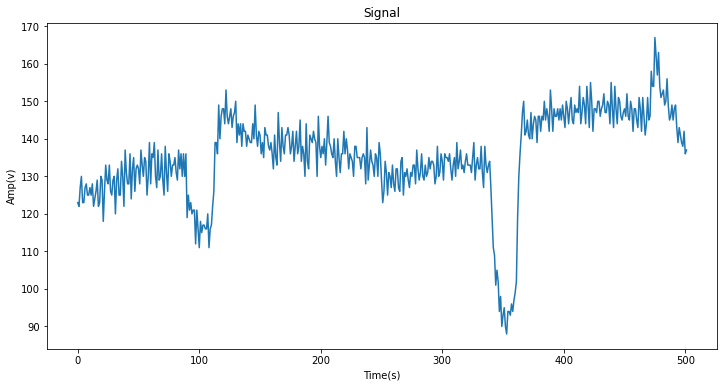

In [11]:
prepare(x,y)